#Water Pollution Detection & Analysis


Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# The "inline" backend renders plots as static PNG images and embeds them in the notebook
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs

Import some importent libraries which are essential for EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I have connected my Google Drive

In [3]:
sp=pd.read_excel("/content/drive/MyDrive/Dataset/Water pollution dataset/WPD_project.xlsx")

I have taken my data from Excel and used pandas to read the excel file.

In [4]:
sp.head() #This code showing the top 5 rows of the dataset

,Station code,Name of the Monitoring Location Primary Water Quality Criteria (PWQC) notified b,State Name,Temperature (0 C)_min,Temperature (0 C)_max,Dissolved Oxygen (mg/ L)_min,Dissolved Oxygen (mg/ L)_MAX,pH(6.5 MIN),pH(6.5 MAX,Conductivity (µmho/ cm) MIN,conductivity (µmho/ cm) MAX,Bio-chemical Oxygen Demand\n(mg/ L),Bio-chemical Oxygen Demand\n(mg/ L) MAX,Nitrate (mg/ L MIN),Nitrate (mg/L MAX),Fecal Coliform (MIN),Fecacal coliform (MAX),Total Coliform (MPN/ 100 mL) MIN,Total Coliform (MPN/ 100 mL)2 MAX,Year
0,1867,RIVER SUTLEJ BEFORE CONF. WITH RIVE...,HIMACHAL PRADESH,7,14,8.9,9.4,8.02,8.42,288,467,BDL,BDL,0.32,0.61,6,20,8,1600,2022
1,2611,RIVER SUTLEJ AFTER CONF. WITH ...,HIMACHAL PRADESH,7,13,9,9.5,8.05,8.56,255,471,BDL,BDL,0.32,0.65,4,24,110,1600,2022
2,3872,RIVER SUTLEJ D/S TIDONG HEP,HIMACHAL PRADESH,6.5,13,8.8,9.4,8.1,8.56,290,2137,BDL,BDL,0.32,0.59,2,17,110,1600,2022
3,4448,RIVER SUTLEJ BEFORE\nCONFLUENCES ...,HIMACHAL PRADESH,6,13,8.9,9.4,8.06,8.52,278,3392,BDL,BDL,0.32,0.62,4,38,2,350,2022
4,4449,RIVER SUTLEJ AFTER CONFLUENCES ...,HIMACHAL PRADESH,6.5,13,8.8,9.4,8.06,8.56,291,3970,BDL,BDL,0.32,0.58,2,170,2,1600,2022


My Data showing the top 5 rows of the dataset

In [5]:
sp.tail() # This code showing the bottom 5 rows of the dataset

,Station code,Name of the Monitoring Location Primary Water Quality Criteria (PWQC) notified b,State Name,Temperature (0 C)_min,Temperature (0 C)_max,Dissolved Oxygen (mg/ L)_min,Dissolved Oxygen (mg/ L)_MAX,pH(6.5 MIN),pH(6.5 MAX,Conductivity (µmho/ cm) MIN,conductivity (µmho/ cm) MAX,Bio-chemical Oxygen Demand\n(mg/ L),Bio-chemical Oxygen Demand\n(mg/ L) MAX,Nitrate (mg/ L MIN),Nitrate (mg/L MAX),Fecal Coliform (MIN),Fecacal coliform (MAX),Total Coliform (MPN/ 100 mL) MIN,Total Coliform (MPN/ 100 mL)2 MAX,Year
3513,30068,SUBARNAREKHA AT GOPIBALLAVPUR (WEST\nBENGAL),INTER-STATE,26,32,6.4,8.9,8,8.8,195,307,1.7,1.7,BDL,0.74,490,16000,790,35000,2020
3514,30069,SUBARNAREKHA AT LAKHANNATH (ORISSA),INTER-STATE,26,32,6.1,9,6.9,8.9,200,315,BDL,1.5,BDL,0.39,490,1100,1100,22000,2020
3515,1641,SUBARNAREKHA AT RAJGHAT (THENGUDIA),ODISHA,18,30,6,8.8,7.2,8.4,134,1224,1,1.8,BDL,4.75,45,2400,170,3500,2020
3516,4710,HALDI RIVER AT NORGHAT,WEST BENGAL,19,32,4.6,8.5,6.85,8.35,265,10430,BDL,3,1.19,4.76,3200,9400,8000,160000,2020
3517,4711,RASULPUR RIVER AT RASULPUR GHAT,WEST BENGAL,20,32,5.7,7.9,7.61,8.35,886,22440,BDL,2.67,0.6,2.39,400,11000,700,22000,2020


Name of the Monitoring Location Primary Water Quality Criteria (PWQC) notified,State Name

In [6]:
sp.shape #this shape methoed used to understand the shape of table.

(3518, 20)

In my dataset i have 3518 rows and 20 columns

In [7]:
sp.info() #This code shows the entire information of the dataset including memory usage and Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 20 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Station code                                                                      3518 non-null   int64 
 1   Name of the Monitoring Location Primary Water Quality Criteria (PWQC) notified b  3517 non-null   object
 2   State Name                                                                        3518 non-null   object
 3   Temperature (0 C)_min                                                             3513 non-null   object
 4   Temperature (0 C)_max                                                             3514 non-null   object
 5   Dissolved Oxygen (mg/ L)_min                                                      3517 non-null   object
 6   Dissolve

The info() helps to understand the data easily and use it for perform the forther process by observing the info i can understand that my data contain the 20 columns and 2 datatypes like(int64,Object) and my data using the memory(549.8+ KB).

In [8]:
sp.describe() # This describe() will help to identify the numberical data and it will performs Statistics like mean,std,min,max...

,Station code,Year
count,3518.000000,3518.000000
mean,4140.349915,2021.154349
std,5637.367362,0.838915
min,1.000000,2020.000000
25%,1632.250000,2020.000000
50%,2743.000000,2021.000000
75%,4028.000000,2022.000000
max,30091.000000,2022.000000


 Data Cleaning

**Pandas Methods to Use:** **bold text**

.isnull().sum() - Identify missing values in each column.
.dropna() or .fillna() - Handle missing values appropriately.
.duplicated() and .drop_duplicates() - Check and remove duplicates if any.
.astype() - Convert columns to appropriate data types if necessary.
Handle outliers if needed:
.quantile() for detecting outliers using IQR.
.clip() to handle extreme values.
Justification: Ensures the dataset is clean, consistent, and ready for analysis by addressing missing or erroneous data points.

.duplicated().sum() - it identify and display the sum of duplicate values

In [9]:
sp.duplicated().sum() #this code help to find the sum of duplicates and datatype of duplicates

np.int64(3)

In [10]:
sp.columns #This code shows the columns of the dataset

Index(['Station code',
       'Name of the Monitoring Location Primary Water Quality Criteria (PWQC) notified b',
       'State Name', 'Temperature (0 C)_min  ', 'Temperature (0 C)_max',
       'Dissolved Oxygen (mg/ L)_min    ', 'Dissolved Oxygen (mg/ L)_MAX',
       'pH(6.5 MIN)         ', 'pH(6.5 MAX   ', 'Conductivity (µmho/ cm) MIN ',
       'conductivity (µmho/ cm) MAX  ',
       'Bio-chemical Oxygen Demand\n(mg/ L)                                              ',
       'Bio-chemical Oxygen Demand\n(mg/ L) MAX   ',
       'Nitrate (mg/ L MIN)                    ', 'Nitrate (mg/L MAX)',
       'Fecal Coliform (MIN)     ', 'Fecacal coliform (MAX)',
       'Total Coliform (MPN/ 100 mL)      MIN',
       'Total Coliform (MPN/ 100 mL)2          MAX ', 'Year'],
      dtype='object')

Up you can see the unstructured column names are come its difficult to understand and perform actions so i have removed special charectors from names.

In [11]:
# First, clean all column names to remove extra spaces, newlines, and special characters
sp.columns = sp.columns.str.replace(r'[()/]', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
# Print the actual column names after cleaning for verification
print("DataFrame columns after cleaning:", sp.columns.tolist())
# Define the numeric columns using the expected *cleaned* names
numeric_cols = [
    'Temperature 0 C_min',
    'Temperature 0 C_max',
    'Dissolved Oxygen mg L_min',
    'Dissolved Oxygen mg L_MAX',
    'pH6.5 MIN',
    'pH6.5 MAX',
    'Conductivity µmho cm MIN',
    'conductivity µmho cm MAX',
    'Bio-chemical Oxygen Demand mg L',
    'Bio-chemical Oxygen Demand mg L MAX',
    'Nitrate mg L MIN',
    'Nitrate mgL MAX',
    'Fecal Coliform MIN',
    'Fecacal coliform MAX',
    'Total Coliform MPN 100 mL MIN',
    'Total Coliform MPN 100 mL2 MAX',
]


DataFrame columns after cleaning: ['Station code', 'Name of the Monitoring Location Primary Water Quality Criteria PWQC notified b', 'State Name', 'Temperature 0 C_min', 'Temperature 0 C_max', 'Dissolved Oxygen mg L_min', 'Dissolved Oxygen mg L_MAX', 'pH6.5 MIN', 'pH6.5 MAX', 'Conductivity µmho cm MIN', 'conductivity µmho cm MAX', 'Bio-chemical Oxygen Demand mg L', 'Bio-chemical Oxygen Demand mg L MAX', 'Nitrate mg L MIN', 'Nitrate mgL MAX', 'Fecal Coliform MIN', 'Fecacal coliform MAX', 'Total Coliform MPN 100 mL MIN', 'Total Coliform MPN 100 mL2 MAX', 'Year']


i have replaced the column names with simple and understandable names.

In [12]:
# Now, apply pd.to_numeric to these cleaned and existing columns
try:
    sp[numeric_cols] = sp[numeric_cols].apply(
        pd.to_numeric, errors='coerce'
    )
    print("Numeric conversion successful for specified columns.")
except KeyError as e:
    print(f"KeyError encountered during numeric conversion: {e}")
    print("Please check if the columns in 'numeric_cols' exactly match the DataFrame columns after cleaning.")
    missing_cols = [col for col in numeric_cols if col not in sp.columns]
    if missing_cols:
        print(f"The following columns from 'numeric_cols' are missing in the DataFrame: {missing_cols}")
    else:
        print("All columns in 'numeric_cols' were found, but another KeyError occurred. Please re-check column names carefully.")

Numeric conversion successful for specified columns.


we cleaned the un structured column names to structured form by removing the special charecters

And we converted the datatypes to object to float64 for sutable columns

In [13]:
sp.dtypes #This code helps to display the Datatypes of columns

,0
Station code,int64
Name of the Monitoring Location Primary Water Quality Criteria PWQC notified b,object
State Name,object
Temperature 0 C_min,float64
Temperature 0 C_max,float64
Dissolved Oxygen mg L_min,float64
Dissolved Oxygen mg L_MAX,float64
pH6.5 MIN,float64
pH6.5 MAX,float64
Conductivity µmho cm MIN,float64


In [14]:
sp.replace([np.inf, -np.inf], np.nan, inplace=True)# convert BDL to nan

In [15]:
sp.head()

,Station code,Name of the Monitoring Location Primary Water Quality Criteria PWQC notified b,State Name,Temperature 0 C_min,Temperature 0 C_max,Dissolved Oxygen mg L_min,Dissolved Oxygen mg L_MAX,pH6.5 MIN,pH6.5 MAX,Conductivity µmho cm MIN,conductivity µmho cm MAX,Bio-chemical Oxygen Demand mg L,Bio-chemical Oxygen Demand mg L MAX,Nitrate mg L MIN,Nitrate mgL MAX,Fecal Coliform MIN,Fecacal coliform MAX,Total Coliform MPN 100 mL MIN,Total Coliform MPN 100 mL2 MAX,Year
0,1867,RIVER SUTLEJ BEFORE CONF. WITH RIVE...,HIMACHAL PRADESH,7.0,14.0,8.9,9.4,8.02,8.42,288.0,467.0,NaN,NaN,0.32,0.61,6.0,20.0,8.0,1600.0,2022
1,2611,RIVER SUTLEJ AFTER CONF. WITH ...,HIMACHAL PRADESH,7.0,13.0,9.0,9.5,8.05,8.56,255.0,471.0,NaN,NaN,0.32,0.65,4.0,24.0,110.0,1600.0,2022
2,3872,RIVER SUTLEJ D/S TIDONG HEP,HIMACHAL PRADESH,6.5,13.0,8.8,9.4,8.10,8.56,290.0,2137.0,NaN,NaN,0.32,0.59,2.0,17.0,110.0,1600.0,2022
3,4448,RIVER SUTLEJ BEFORE\nCONFLUENCES ...,HIMACHAL PRADESH,6.0,13.0,8.9,9.4,8.06,8.52,278.0,3392.0,NaN,NaN,0.32,0.62,4.0,38.0,2.0,350.0,2022
4,4449,RIVER SUTLEJ AFTER CONFLUENCES ...,HIMACHAL PRADESH,6.5,13.0,8.8,9.4,8.06,8.56,291.0,3970.0,NaN,NaN,0.32,0.58,2.0,170.0,2.0,1600.0,2022


In [16]:
sp.isnull().sum() #This function helps to identify the null values in a table

,0
Station code,0
Name of the Monitoring Location Primary Water Quality Criteria PWQC notified b,1
State Name,0
Temperature 0 C_min,102
Temperature 0 C_max,100
Dissolved Oxygen mg L_min,25
Dissolved Oxygen mg L_MAX,23
pH6.5 MIN,101
pH6.5 MAX,100
Conductivity µmho cm MIN,225


In [17]:
sp.fillna(sp.mean(numeric_only=True), inplace=True) #This code convert the null values with mean value for every numarical datatype

In [18]:
sp.fillna(sp.mode().iloc[0], inplace=True) #This code convert the null values in object datatype to mode values of entier data

In [19]:
sp.isnull().sum()

,0
Station code,0
Name of the Monitoring Location Primary Water Quality Criteria PWQC notified b,0
State Name,0
Temperature 0 C_min,0
Temperature 0 C_max,0
Dissolved Oxygen mg L_min,0
Dissolved Oxygen mg L_MAX,0
pH6.5 MIN,0
pH6.5 MAX,0
Conductivity µmho cm MIN,0


After replacing the null values we can say that we have cleared all null values


In [20]:
sp['aquatic_score'] = 0
# Dissolved Oxygen (higher is better)
sp.loc[sp['Dissolved Oxygen mg L_min'] >= 5, 'aquatic_score'] += 1
# BOD (lower is better)
sp.loc[sp['Bio-chemical Oxygen Demand mg L MAX'] <= 3, 'aquatic_score'] += 1
# pH (neutral range)
sp.loc[
    (sp['pH6.5 MIN'] >= 6.5) & (sp['pH6.5 MAX'] <= 8.5),
    'aquatic_score'
] += 1
# Fecal Coliform (low contamination)
sp.loc[sp['Fecacal coliform MAX'] <= 500, 'aquatic_score'] += 1

In [21]:
sp['aquatic_score'].value_counts() #this code shows the total count of aquatic_score

,count
aquatic_score,
3,1354
4,878
2,730
1,509
0,47


Here we have the 5 types of Aquatic_Scoure 0-4 and we can see that type 3 is more in percentage.

In [22]:
sp.rename(columns={'Name of the Monitoring Location Primary Water Quality Criteria PWQC notified b':'Name of the Monitoring Location'},inplace=True)

In [23]:
sp.sort_values('aquatic_score', ascending=False).head(10)[
    ['Name of the Monitoring Location', 'State Name', 'aquatic_score']
]

,Name of the Monitoring Location,State Name,aquatic_score
21,RIVER SUTLEJ U/S OF EXIT POINT OF DEHAR POW...,HIMACHAL PRADESH,4
3509,SUBARNAREKHA AT HATIA DAM,JHARKHAND,4
3510,SUBARNAREKHA AT GATALSUD DAM,JHARKHAND,4
2228,RIVER RANGIT AT DAM SITE\n(NHPC),SIKKIM,4
3481,HEMAVATI AT D/S OF HOLENARASIPURA TOWN AT RAMA...,KARNATAKA,4
3495,"KABINI AT MUTHANKARA, KERALA",KERALA,4
3494,"KABINI AT SARAGUR VILLAGE D/S,",KARNATAKA,4
3493,KABINI AT CAUSE WAY SATTUR,KARNATAKA,4
2223,RIVER TEESTA AT MELLI\nDOWNSTREAM,SIKKIM,4
3485,SHIMSHA AT WATER SUPPLY INTAKE POINT AT MADDUAR,KARNATAKA,4


These are the top 10 states and names of location with aquatic_score is 4.

In [24]:
best_aquatic = sp[
    (sp['Dissolved Oxygen mg L_min'] >= 5) &
    (sp['Bio-chemical Oxygen Demand mg L MAX'] <= 3) &
    (sp['Fecacal coliform MAX'] <= 500)
]
best_aquatic[['Name of the Monitoring Location', 'State Name']].head(5)

,Name of the Monitoring Location,State Name
17,RIVER SUTLEJ NEAR LUHNOO GROUND,HIMACHAL PRADESH
21,RIVER SUTLEJ U/S OF EXIT POINT OF DEHAR POW...,HIMACHAL PRADESH
62,"RIVER RAVI AT U/S OF MADHOPUR HEADWORKS, GURDA...",PUNJAB
103,RIVER SWAN U/S INDUSTRIAL ...,HIMACHAL PRADESH
104,RIVER SWAN D/S\nINDUSTRIAL ...,HIMACHAL PRADESH


This table shows the best_aquatic places top 5 most of the places  from Himachal Pradesh and Punjab

In [25]:
# import matplotlib.pyplot as plt
# top_locations = (
#     sp.groupby('Name of the Monitoring Location')['aquatic_score']
#     .mean()
#     .sort_values(ascending=False)
#     .head(10)
# )
# plt.figure()
# top_locations.plot(kind='bar')
# plt.xlabel('Monitoring Location')
# plt.ylabel('Average Aquatic Suitability Score')
# plt.title('Top 10 Locations Suitable for Aquatic Life')
# plt.xticks(rotation=75)
# plt.show()


In [26]:
sp['Name of the Monitoring Location'].nunique()

3474

In [27]:
sp['Name of the Monitoring Location'].count()

np.int64(3518)

#Bar Graph – Distribution of Aquatic Suitability Scores

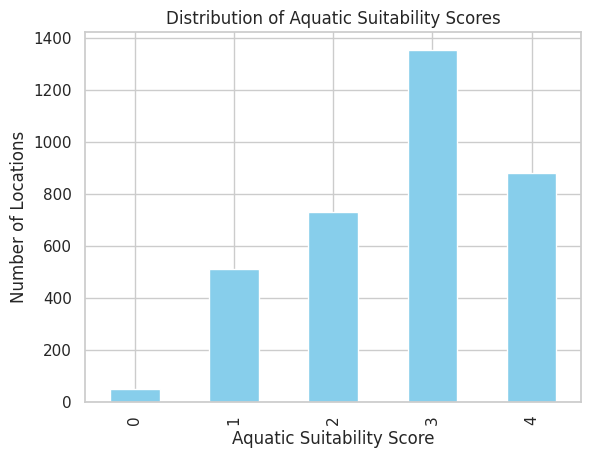

In [28]:
from matplotlib.typing import ColorType
import matplotlib.pyplot as plt
score_counts = sp['aquatic_score'].value_counts().sort_index()
plt.figure()
score_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Aquatic Suitability Score')
plt.ylabel('Number of Locations')
plt.title('Distribution of Aquatic Suitability Scores')
plt.show()


Here we have the 5 types of Aquatic_Scoure 0-4 and we can see that type 3 is more in percentage in Distribution of Aquatic Suitability Scores.where 0=High polluted water,1=Polluted water,2=Moderated water,3= Excellent water,4=Pure water

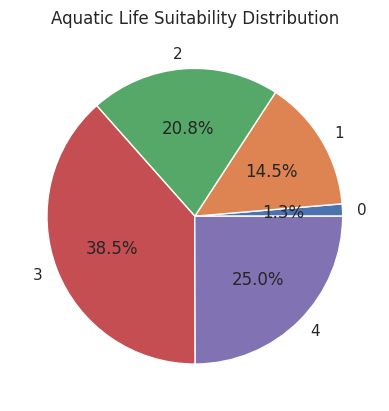

In [29]:
plt.figure()
score_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Aquatic Life Suitability Distribution')
plt.show()

This Pie plot shows the 5 different percentage of the Aquatic life suitability Distribution where 0 type has the less percetage 1.3% and 3 type has the high percentage 38.5%.

#Scatter Plot – Dissolved Oxygen vs BOD

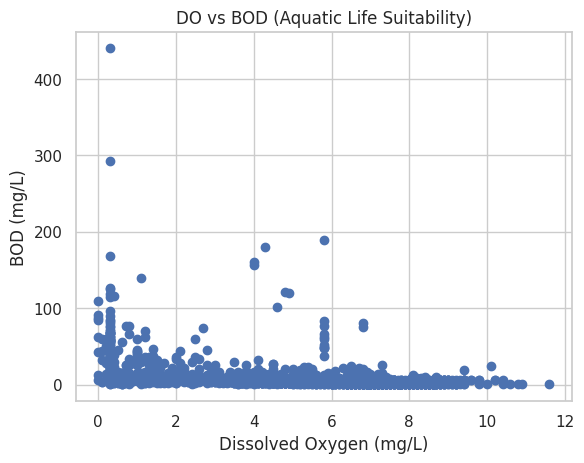

In [30]:
plt.figure()
plt.scatter(
    sp['Dissolved Oxygen mg L_min'],
    sp['Bio-chemical Oxygen Demand mg L MAX']
)
plt.xlabel('Dissolved Oxygen (mg/L)')
plt.ylabel('BOD (mg/L)')
plt.title('DO vs BOD (Aquatic Life Suitability)')
plt.show()


This graph shows the relationship between dissolved oxygen and pollution in water. When the amount of oxygen in the water is very low, the pollution level (BOD) is usually high. This means the water is dirty and not healthy for aquatic life. As the oxygen level increases, pollution decreases, and the water becomes cleaner and safer for fish and other aquatic organisms. Overall, the graph clearly shows that low oxygen and high pollution go hand in hand.


In [31]:
sp['State Name'].nunique()

46

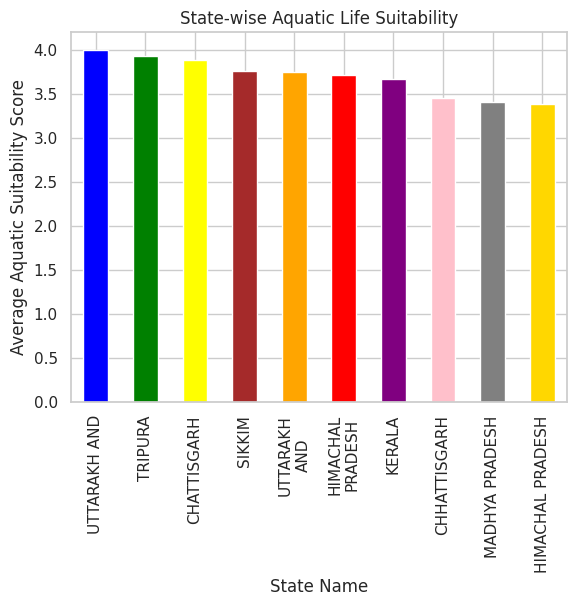

In [32]:
state_score = (
    sp.groupby('State Name')['aquatic_score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
colors = [
    'blue',  'green', 'yellow', 'brown', 'orange', 'red', 'purple',
    'pink', 'gray', 'gold'
]
plt.figure()
state_score.plot(kind='bar',color=colors)
plt.xlabel('State Name')
plt.ylabel('Average Aquatic Suitability Score')
plt.title('State-wise Aquatic Life Suitability')
plt.xticks(rotation=90)
plt.show()

This bar graph shows the top 10 State-wise Aquatic Life Suitability.The chart shows that Uttarakhand has the highest aquatic life suitability score, indicating very good water quality. Tripura and Chhattisgarh also perform well, reflecting favorable conditions for aquatic life. Overall, most states have scores above 3, suggesting generally healthy water conditions, while states like Himachal Pradesh and Madhya Pradesh show comparatively lower scores but still remain within a moderate range.

In [33]:
print(sp.columns.tolist()) #this code helps to show the columns of table

['Station code', 'Name of the Monitoring Location', 'State Name', 'Temperature 0 C_min', 'Temperature 0 C_max', 'Dissolved Oxygen mg L_min', 'Dissolved Oxygen mg L_MAX', 'pH6.5 MIN', 'pH6.5 MAX', 'Conductivity µmho cm MIN', 'conductivity µmho cm MAX', 'Bio-chemical Oxygen Demand mg L', 'Bio-chemical Oxygen Demand mg L MAX', 'Nitrate mg L MIN', 'Nitrate mgL MAX', 'Fecal Coliform MIN', 'Fecacal coliform MAX', 'Total Coliform MPN 100 mL MIN', 'Total Coliform MPN 100 mL2 MAX', 'Year', 'aquatic_score']


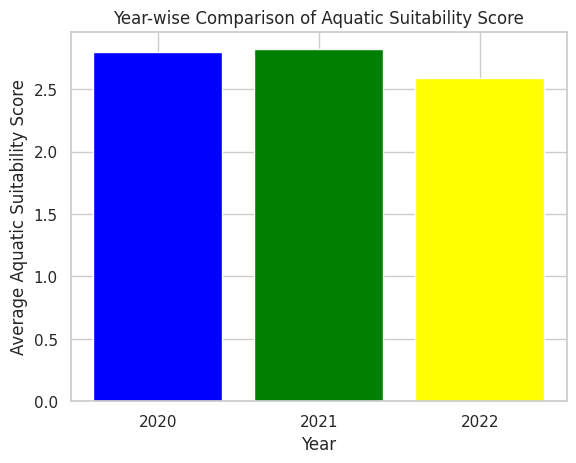

In [34]:
year_aquatic_score = (
    sp.groupby('Year')['aquatic_score']
    .mean()
    .reset_index()
)
year_aquatic_score['Year'] = year_aquatic_score['Year'].astype(str)

import matplotlib.pyplot as plt
plt.figure()
plt.bar(year_aquatic_score['Year'], year_aquatic_score['aquatic_score'],color=colors)
plt.xlabel('Year')
plt.ylabel('Average Aquatic Suitability Score')
plt.title('Year-wise Comparison of Aquatic Suitability Score')
plt.show()



This bar graph shows the Year-wise Comparison of Aquatic Suitability Score where we can see the 2022 has the less Avg aquatic score compared to 2020 & 2021.

In which area the most water is polluted?

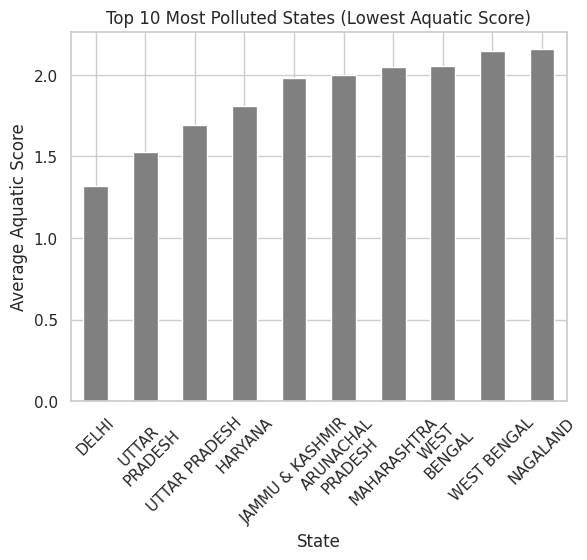

In [35]:
polluted_states = (
    sp.groupby('State Name')['aquatic_score']
    .mean()
    .sort_values()
    .head(10)
)
polluted_states.plot(kind='bar',color='grey')
plt.title('Top 10 Most Polluted States (Lowest Aquatic Score)')
plt.ylabel('Average Aquatic Score')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()


These are the  most  water polluted states compared to other states

How much % of water is present for drinking?

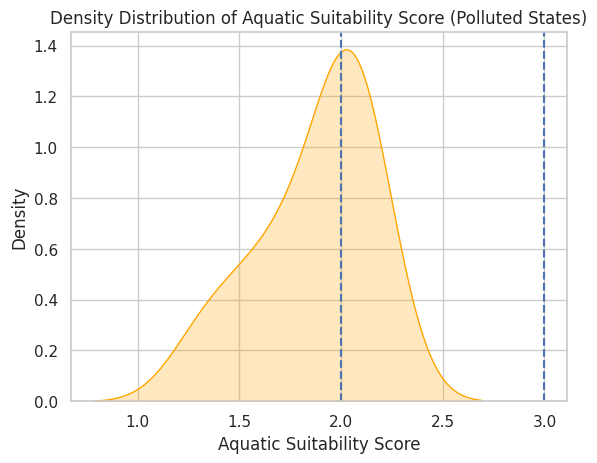

In [36]:
plt.figure()
sns.kdeplot(x=polluted_states, fill=True,color='orange')
plt.axvline(2, linestyle='--')   # moderate threshold
plt.axvline(3, linestyle='--')   # safe threshold
plt.title('Density Distribution of Aquatic Suitability Score (Polluted States)')
plt.xlabel('Aquatic Suitability Score')
plt.ylabel('Density')
plt.show()

The KDE plot shows how aquatic suitability scores are spread across polluted states. Most of the values are clustered around a score of 2, indicating that a large number of polluted states fall into the moderately polluted category. As the score approaches 3, the density drops sharply, which suggests that only a very small proportion of polluted states manage to reach safe water quality levels.

In which year the water pollution is more?

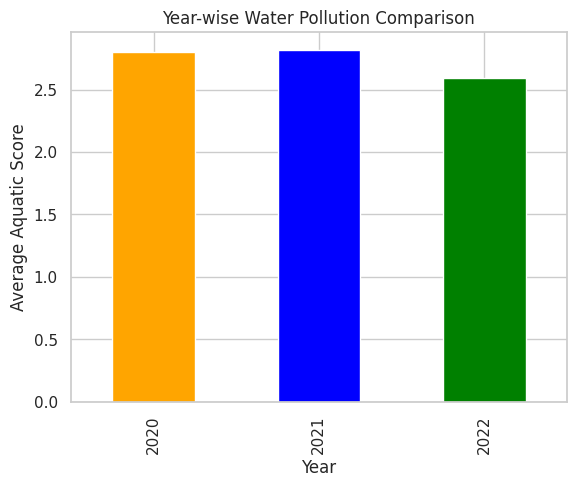

In [37]:
year_pollution = sp.groupby('Year')['aquatic_score'].mean()
color=['orange','blue','green']
year_pollution.plot(kind='bar',color=color)
plt.title('Year-wise Water Pollution Comparison')
plt.ylabel('Average Aquatic Score')
plt.xlabel('Year')
plt.show()


Water quality slightly improved from 2020 to 2021, but it declined in 2022, showing an increase in water pollution in the most recent year.

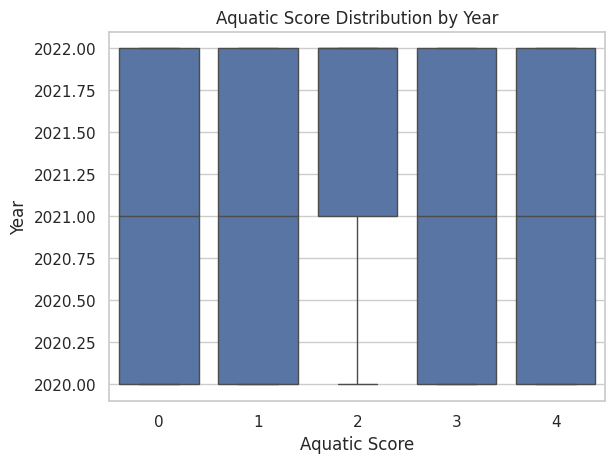

In [38]:
sns,sns.boxplot(x='aquatic_score',y='Year',data=sp)
plt.title('Aquatic Score Distribution by Year')
plt.xlabel('Aquatic Score')
plt.ylabel('Year')
plt.show()

The distribution shows that aquatic scores are spread across all categories each year, with most values concentrated in the moderate to good range. This indicates that water quality remains fairly consistent over the years, with no extreme shift toward either very poor or very excellent conditions.

Types of water

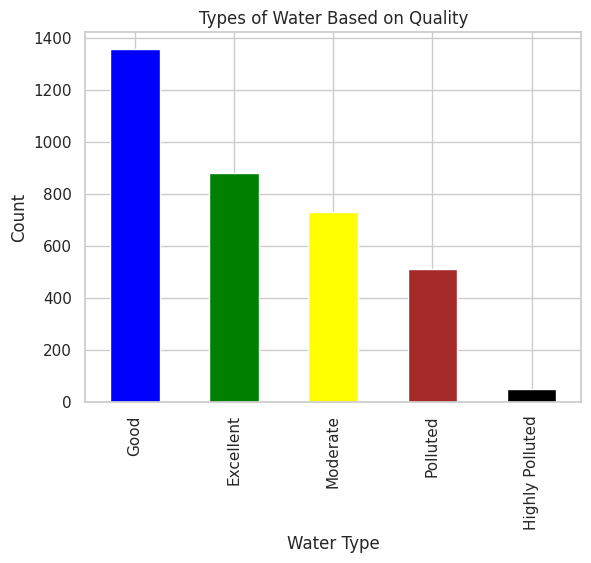

In [39]:
sp['water_type'] = sp['aquatic_score'].map({
    4: 'Excellent',
    3: 'Good',
    2: 'Moderate',
    1: 'Polluted',
    0: 'Highly Polluted'
})
colors = [
    'blue', 'green', 'yellow', 'brown',
    'black'
]
sp['water_type'].value_counts().plot(kind='bar',color=colors)
plt.title('Types of Water Based on Quality')
plt.ylabel('Count')
plt.xlabel('Water Type')
plt.show()


By seeing this graph we can say that we have less in percent highlhy polluted water and Good water percentage is high in number.

In which state the BOD is high?

In [40]:
sp['State Name'].value_counts().head(10)

,count
State Name,
MADHYA PRADESH,342
ODISHA,288
HIMACHAL PRADESH,252
BIHAR,248
UTTAR PRADESH,205
ASSAM,197
KARNATAKA,158
MAHARASHTRA,156
GUJARAT,120


Here you can see the top states the BOD levels are high the first place is Madhya Pradesh and the bottom 10th place is West Bengal BOD level is less better than other 9 states.

In [41]:
sp['State Name'] = (
    sp['State Name']
    .astype(str)
    .str.replace('\n', ' ', regex=True)   # remove newline
    .str.strip()                          # remove extra spaces
    .str.upper()                          # standardize case
)

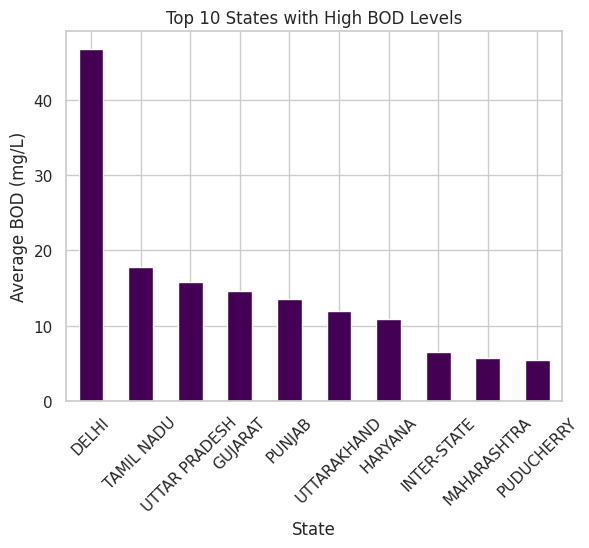

In [42]:
bod_states = (
    sp.groupby('State Name')['Bio-chemical Oxygen Demand mg L MAX']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure()
bod_states.plot(kind='bar', colormap='viridis')
plt.title('Top 10 States with High BOD Levels')
plt.ylabel('Average BOD (mg/L)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

This graph shows the Top 10 States with high BOD levels it means most polluted water.Delhi is top position in water pollution and the Maharastra & Punduhery is equal in water pollution in fact less compared to other states.

In [43]:
top_states = (
    sp.groupby('State Name')['Bio-chemical Oxygen Demand mg L MAX']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

In [44]:
bod_3yrs = sp[
    sp['State Name'].isin(top_states)
][['State Name', 'Year', 'Bio-chemical Oxygen Demand mg L MAX']]

In [45]:
bod_pivot = bod_3yrs.pivot_table(
    index='State Name',
    columns='Year',
    values='Bio-chemical Oxygen Demand mg L MAX',
    aggfunc='mean'
)
bod_pivot.columns = ['BOD 2021', 'BOD 2022', 'BOD 2020']

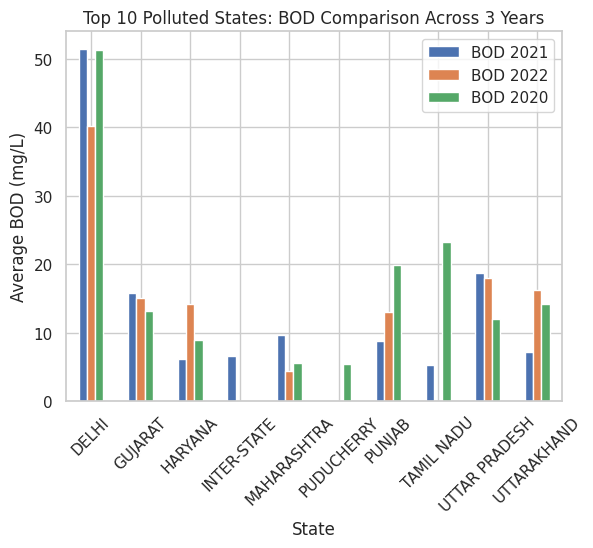

In [46]:
bod_pivot.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Average BOD (mg/L)')
plt.title('Top 10 Polluted States: BOD Comparison Across 3 Years')
plt.xticks(rotation=45)
plt.show()

Delhi remains the most polluted state across all three years, while other states show varying BOD levels, indicating uneven pollution trends over time.

In [47]:
def ph_category(ph):
    if ph < 6.5:
        return 'Acidic (<6.5)'
    elif 6.5 <= ph <= 8.5:
        return 'Neutral (6.5–8.5)'
    else:
        return 'Alkaline (>8.5)'

sp['pH_category'] = sp['pH6.5 MIN'].apply(ph_category)


In [48]:
ph_pct = sp['pH_category'].value_counts(normalize=True) * 100
ph_pct


,proportion
pH_category,
Neutral (6.5–8.5),95.935190
Acidic (<6.5),3.979534
Alkaline (>8.5),0.085276


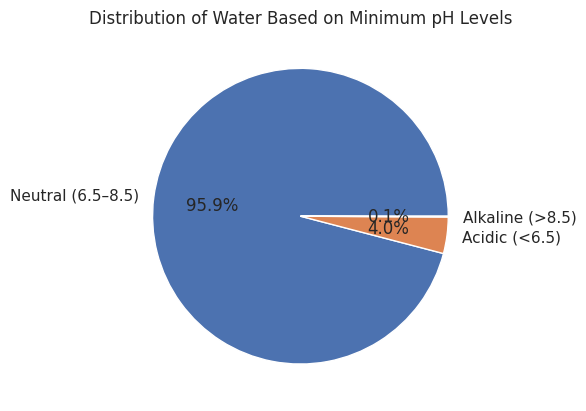

In [49]:
import matplotlib.pyplot as plt

plt.figure()
ph_pct.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Water Based on Minimum pH Levels')
plt.ylabel('')
plt.show()


Most water samples have a neutral pH, while acidic and alkaline conditions are relatively rare.

In [50]:
sp['State Name'] = (
    sp['State Name']
    .astype(str)
    .str.replace('\n', ' ', regex=True)
    .str.strip()
    .str.upper()
)
sp['Year'] = sp['Year'].astype(int)

In [51]:
sp_3yrs = sp[sp['Year'].isin([2021, 2022, 2020])]

In [52]:
top5_bod_yearwise = (
    sp_3yrs
    .groupby(['Year', 'State Name'])['Bio-chemical Oxygen Demand mg L MAX']
    .mean()
    .reset_index()
    .sort_values(['Year', 'Bio-chemical Oxygen Demand mg L MAX'], ascending=[True, False])
)

In [53]:
top5_per_year = top5_bod_yearwise.groupby('Year').head(5)
top5_per_year

,Year,State Name,Bio-chemical Oxygen Demand mg L MAX
4,2020,DELHI,51.475000
23,2020,UTTAR PRADESH,18.657317
5,2020,GUJARAT,15.826606
14,2020,MAHARASHTRA,9.641667
18,2020,PUNJAB,8.844444
30,2021,DELHI,40.250000
48,2021,UTTAR PRADESH,17.984848
50,2021,UTTARAKHAND,16.185714
31,2021,GUJARAT,15.002439
32,2021,HARYANA,14.215385


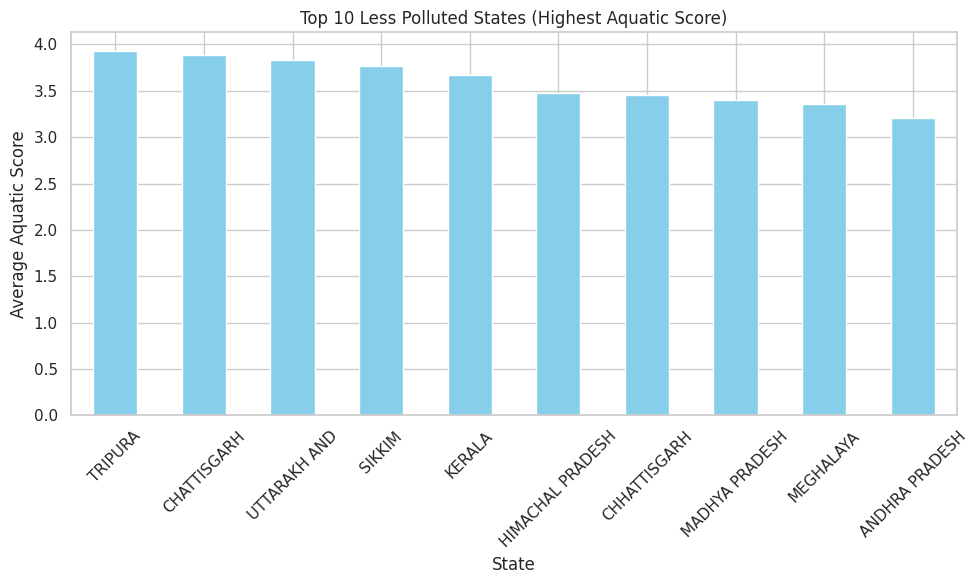

In [54]:
less_polluted_states = (
    sp.groupby('State Name')['aquatic_score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10, 6))
less_polluted_states.plot(kind='bar', color='skyblue')
plt.title('Top 10 Less Polluted States (Highest Aquatic Score)')
plt.ylabel('Average Aquatic Score')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These states exhibit comparatively better water quality, with Tripura and Chhattisgarh leading in aquatic suitability.

Text(0, 0.5, 'Average Aquatic Score')

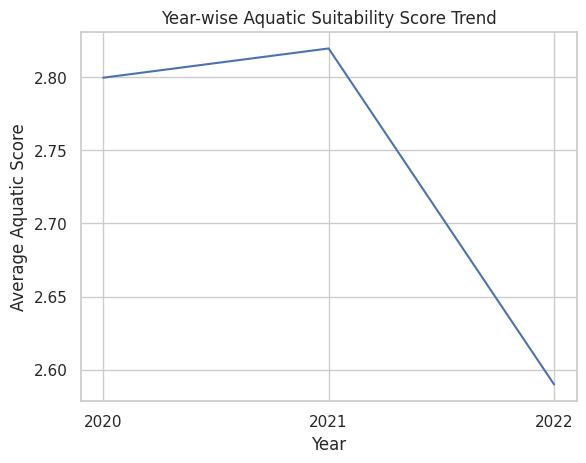

In [55]:
sns.lineplot(data=year_aquatic_score,x='Year',y="aquatic_score")
plt.title('Year-wise Aquatic Suitability Score Trend')
plt.xlabel('Year')
plt.ylabel('Average Aquatic Score')

The line chart shows a slight improvement in aquatic suitability from 2020 to 2021, followed by a noticeable decline in 2022, indicating a drop in overall water quality during the last year.

In [56]:
top5_states = (
    sp.groupby('State Name')['aquatic_score']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

In [57]:
# top5_drinkable_states.plot(kind='pie')
top5_data = sp[sp['State Name'].isin(top5_states)]

In [58]:
drinkable_pct_state = (
    top5_data
    .assign(is_drinkable = top5_data['aquatic_score'] >= 3)
    .groupby('State Name')['is_drinkable']
    .mean() * 100
)

In [59]:
drinkable_pct_state

,is_drinkable
State Name,
CHATTISGARH,100.000000
KERALA,83.333333
SIKKIM,97.368421
TRIPURA,100.000000
UTTARAKH AND,100.000000


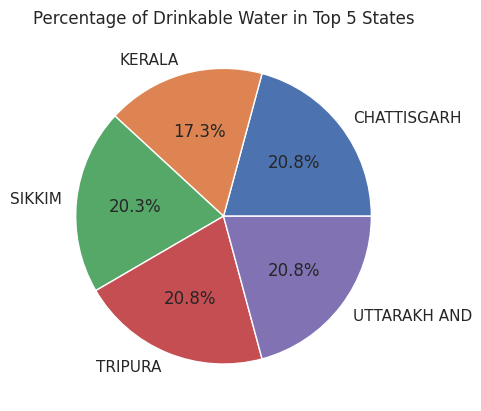

In [60]:
plt.figure()
drinkable_pct_state.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Drinkable Water in Top 5 States')
plt.ylabel('')
plt.show()


The pie chart shows that drinkable water is fairly evenly distributed among the top five states, with Chhattisgarh, Uttarakhand, and Tripura contributing the highest shares. Kerala has a slightly lower proportion, while Sikkim remains comparable to the leading states.

Identify Top 5 & Bottom 5 States

In [61]:
state_score = (
    sp.groupby('State Name')['aquatic_score']
    .mean()
)
top5_states = state_score.sort_values(ascending=False).head(5).index
bottom5_states = state_score.sort_values().head(5).index

Calculate % of Drinkable Water for Each State

In [62]:
def drinkable_percentage(df):
    return (df['aquatic_score'] >= 3).mean() * 100
top5_pct = (
    sp[sp['State Name'].isin(top5_states)]
    .groupby('State Name')
    .apply(drinkable_percentage)
)
bottom5_pct = (
    sp[sp['State Name'].isin(bottom5_states)]
    .groupby('State Name')
    .apply(drinkable_percentage)
)

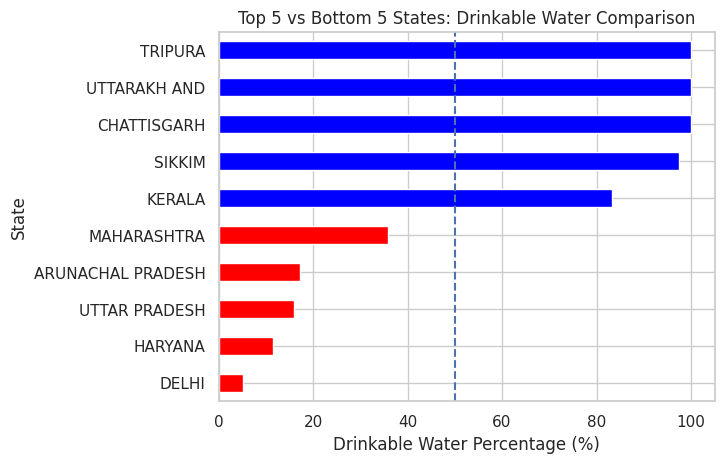

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
# Combine Top 5 and Bottom 5 results
combined = pd.concat([top5_pct, bottom5_pct]).sort_values()
colors = ['red'] * len(bottom5_pct) + ['blue'] * len(top5_pct)
plt.figure()
combined.sort_values().plot(kind='barh',color=colors)  # barh = horizontal bar chart
plt.axvline(50, linestyle='--')  # 50% reference line
plt.xlabel('Drinkable Water Percentage (%)')
plt.ylabel('State')
plt.title('Top 5 vs Bottom 5 States: Drinkable Water Comparison')
plt.show()

After Seeing this chart we can say that the Delhi,Haryana,Uttar Pradesh,Arunachal Pradesh,Maharashtra are have very less drinking water.And Tripura,Uttarakhand,chattisgarh,Sikkim,Kerala have mose dinking water compared to all other states.

#Why is water polluted? (Root Cause Insight)



Because high organic waste (high BOD) consumes oxygen, leading to low DO, which harms aquatic life.

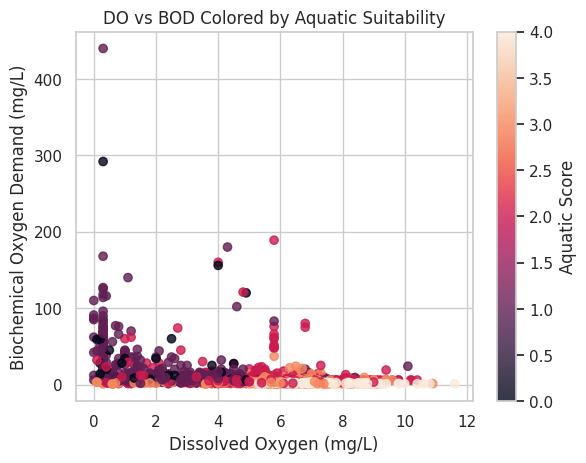

In [64]:
import matplotlib.pyplot as plt

plt.figure()
scatter = plt.scatter(
    sp['Dissolved Oxygen mg L_min'],
    sp['Bio-chemical Oxygen Demand mg L MAX'],
    c=sp['aquatic_score'],   # color by aquatic score
    alpha=0.8                # transparency
)
plt.xlabel('Dissolved Oxygen (mg/L)')
plt.ylabel('Biochemical Oxygen Demand (mg/L)')
plt.title('DO vs BOD Colored by Aquatic Suitability')
plt.colorbar(scatter, label='Aquatic Score')
plt.show()

This Scatterplot shows the relation between Disolved Oxygen and Biochemical Oxygen Demand.if we have high BOD and less DO it means the water is polluted and if we have high DO level than BOD level then we can say that is best water not polluted.

In [65]:
# sp.to_csv('Water pollution.csv', index=False)

# Conclution: The analysis reveals significant spatial and temporal variations in water quality, with organic pollution emerging as the primary cause, underscoring the need for focused interventions in highly polluted regions.